In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pip install xlrd


Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.


In [2]:
df=pd.read_excel("superstore.xls")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [3]:
df['Order ID'].unique()

array(['CA-2013-152156', 'CA-2013-138688', 'US-2012-108966', ...,
       'CA-2011-110422', 'CA-2014-121258', 'CA-2014-119914'], dtype=object)

In [4]:
df['Country']=df['Order ID'].str.split('-',expand=True)[0]

In [7]:
df['Ship Mode'].value_counts()

Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64

In [4]:
df['Delivery Days'] = (df['Ship Date'] - df['Order Date']).dt.days

In [7]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Delivery Days
0,1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,3
1,2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,3
2,3,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714,4


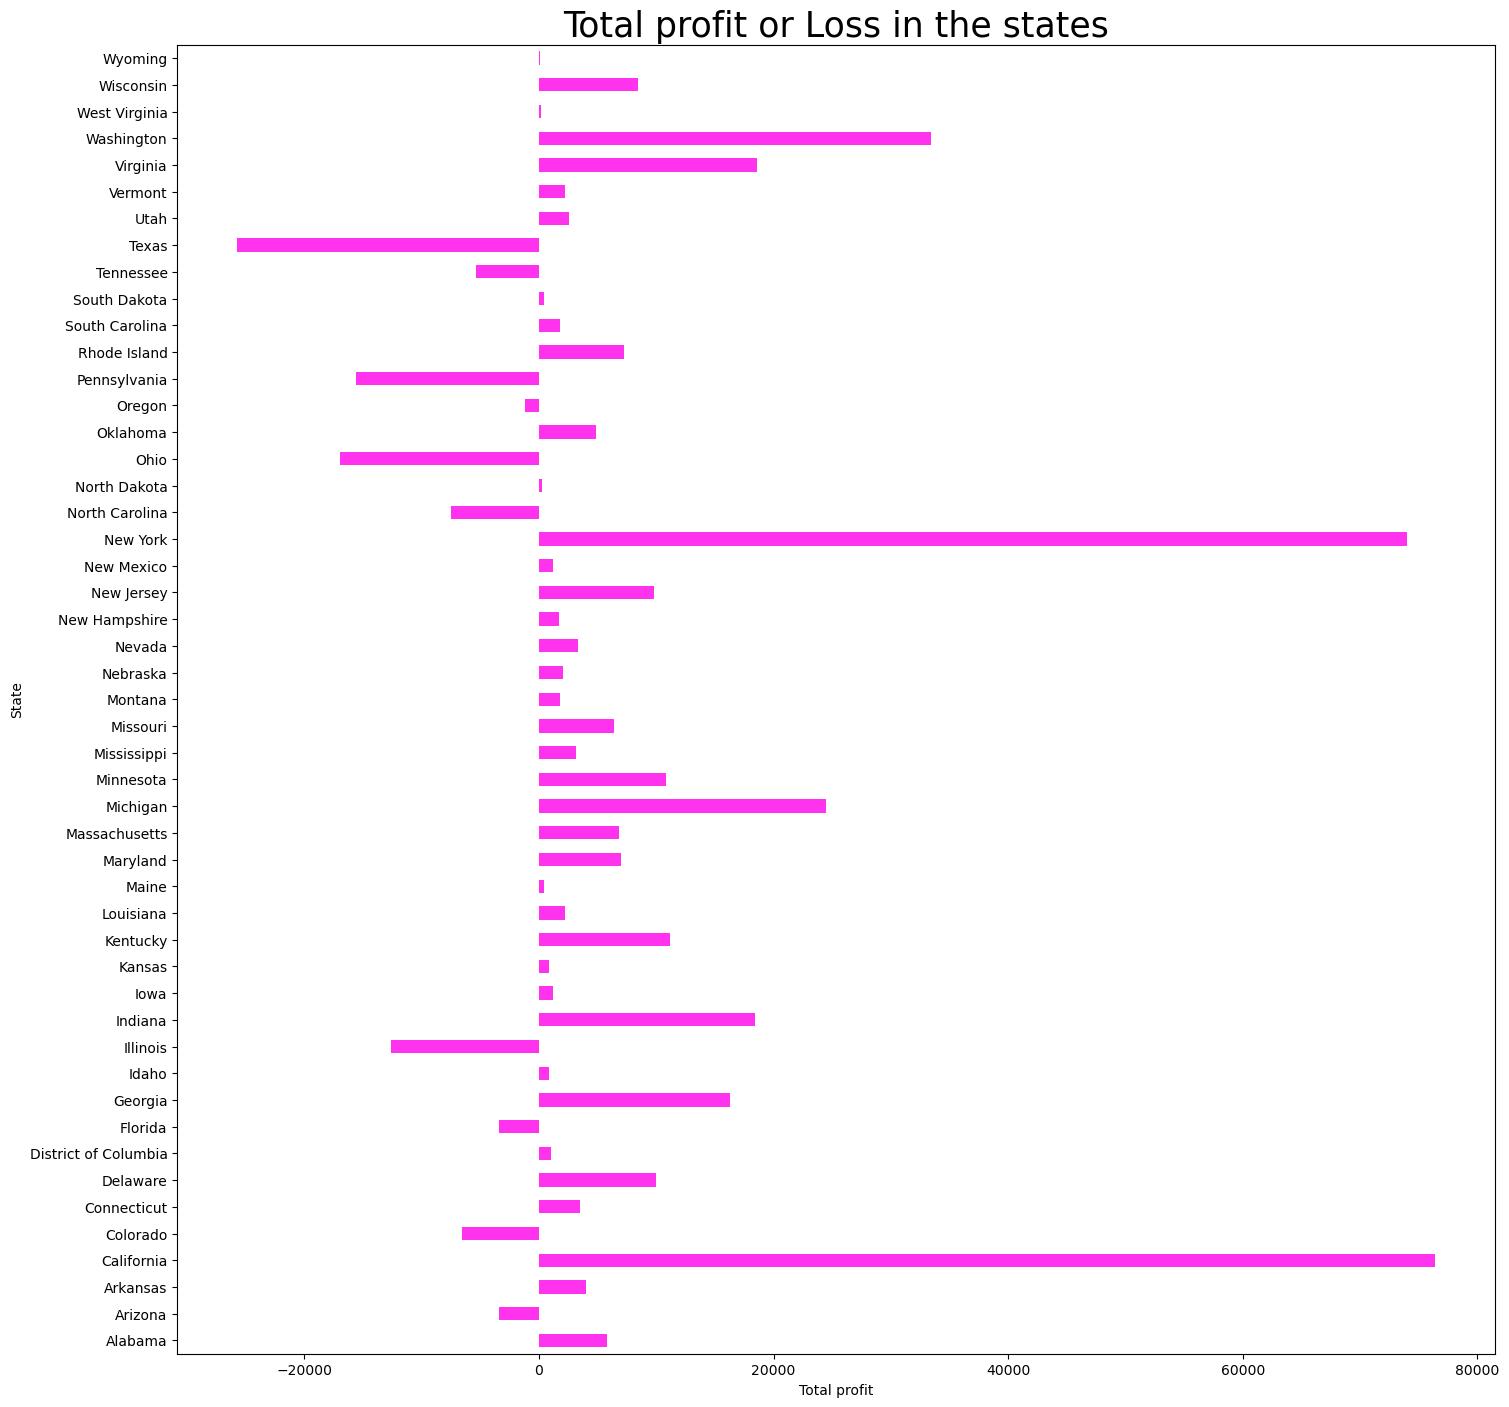

In [93]:
plt.figure(figsize=(17,17)) 
(df.groupby('State')['Profit'].sum()).plot(
    kind='barh',
    ylabel='State',
    xlabel='Total profit',
    color='#ff33ee'

)
plt.title('Total profit or Loss in the states',fontsize=25)
plt.show()

### Texas has the most lost. While in California, company makes the highest profit. 

In [32]:
df['Sales'].corr(df['Profit'])

0.4790643497377063

### This indicates, Although there is higher sales , it does not always means that profit is also high, may be product cost is high. so that.

# Let's Have a Look Which Products Have the Highest or Lowest Profit

In [44]:

df.groupby('Product Name')['Profit'].mean().sort_values()


Product Name
Cubify CubeX 3D Printer Triple Head Print                               -3839.990400
Cubify CubeX 3D Printer Double Head Print                               -2959.990133
Cisco TelePresence System EX90 Videoconferencing Unit                   -1811.078400
Lexmark MX611dhe Monochrome Laser Printer                               -1147.493250
Zebra GK420t Direct Thermal/Thermal Transfer Printer                     -938.280000
                                                                            ...     
Zebra ZM400 Thermal Label Printer                                        1671.768000
3D Systems Cube Printer, 2nd Generation, Magenta                         1858.985700
Ativa V4110MDD Micro-Cut Shredder                                        1886.473050
Canon imageCLASS MF7460 Monochrome Digital Laser Multifunction Copier    1995.990000
Canon imageCLASS 2200 Advanced Copier                                    5039.985600
Name: Profit, Length: 1841, dtype: float64

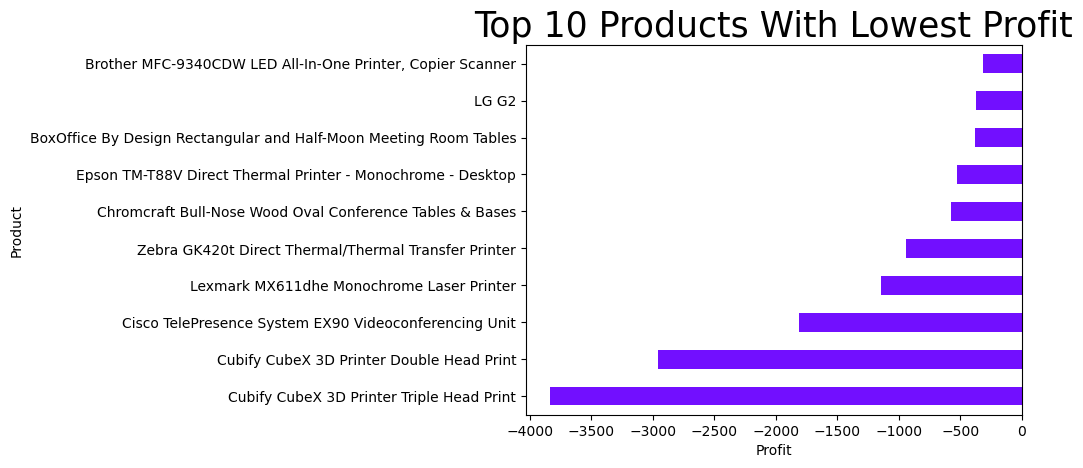

In [92]:
df.groupby('Product Name')['Profit'].mean().sort_values().head(10).plot(
    kind='barh',
    ylabel='Product',
    xlabel='Profit',
    color='#720fff'
)
plt.title('Top 10 Products With Lowest Profit',fontsize=25)
plt.show()

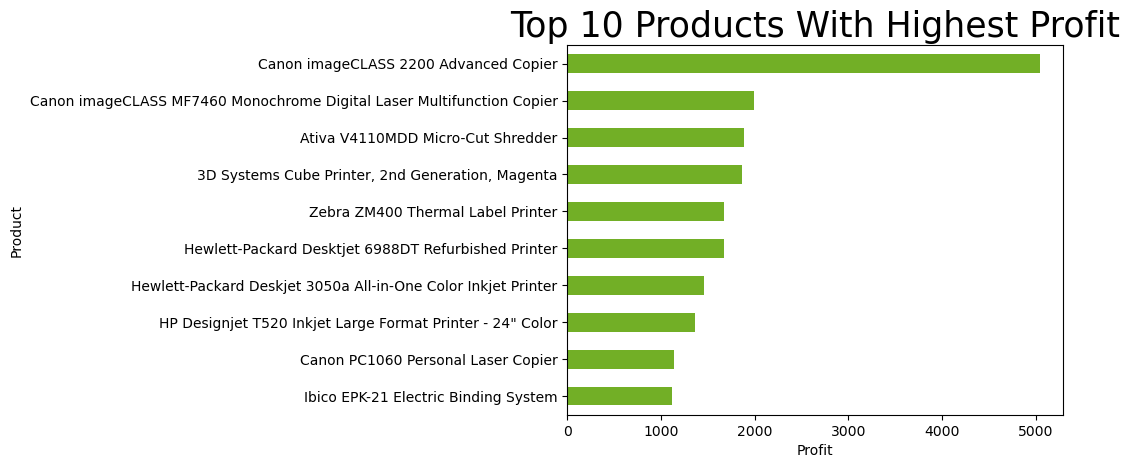

In [91]:
df.groupby('Product Name')['Profit'].mean().sort_values().tail(10).plot(
    kind='barh',
    ylabel='Product',
    xlabel='Profit',
    color='#72af26'
)
plt.title('Top 10 Products With Highest Profit',fontsize=25)
plt.show()

# Let's Have a Look Which Products Have the Highest or Lowest Sales

In [62]:
df.groupby('Product Name')['Sales'].sum().sort_values()

Product Name
Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac                   1.624
Avery 5                                                                            5.760
Xerox 20                                                                           6.480
Grip Seal Envelopes                                                                7.072
Avery Hi-Liter Pen Style Six-Color Fluorescent Set                                 7.700
                                                                                 ...    
GBC DocuBind TL300 Electric Binding System                                     19823.479
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Name: Sa

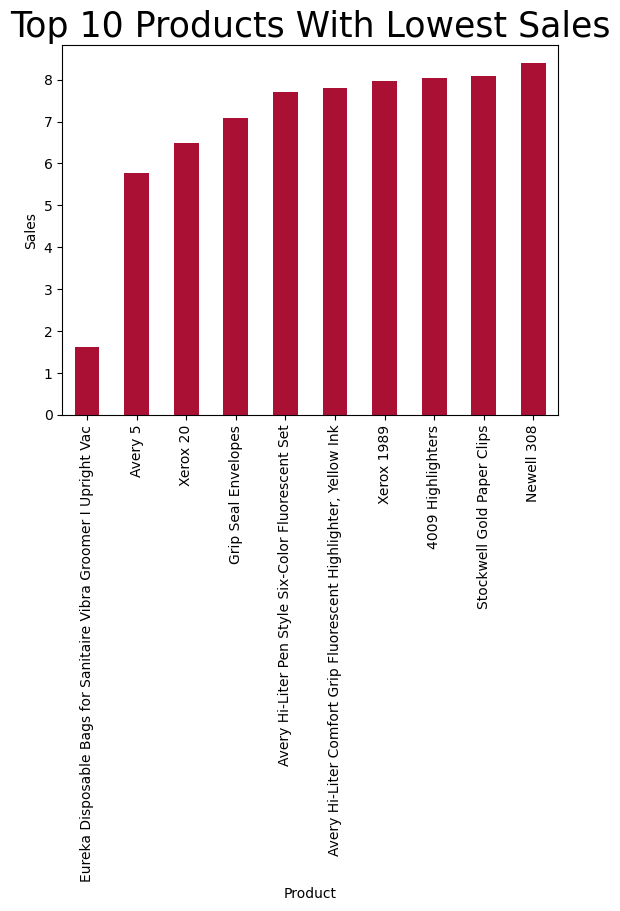

In [90]:
df.groupby('Product Name')['Sales'].sum().sort_values().head(10).plot(
    kind='bar',
    xlabel='Product',
    ylabel='Sales',
    color='#aa0f34'
)
plt.title('Top 10 Products With Lowest Sales',fontsize=25)
plt.show()

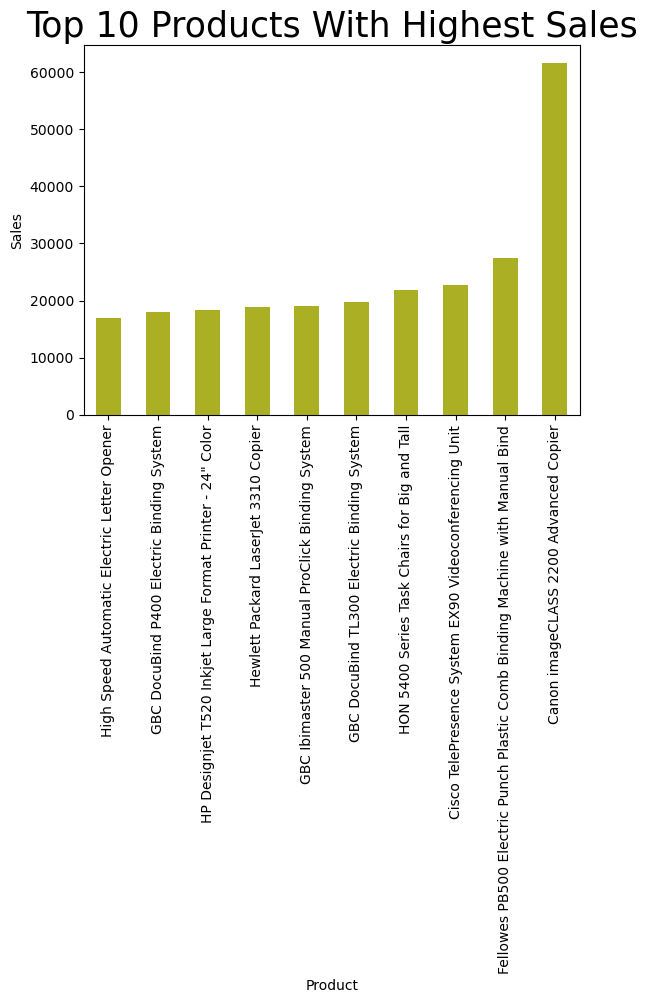

In [89]:
df.groupby('Product Name')['Sales'].sum().sort_values().tail(10).plot(
    kind='bar',
    xlabel='Product',
    ylabel='Sales',
    color='#aaaf24'
)
plt.title('Top 10 Products With Highest Sales',fontsize=25)
plt.show()

### 'Canon imageCLASS 2200 Advanced Copier'  - This product has highest profit as well as highest sales also. Most demanding product indeed.

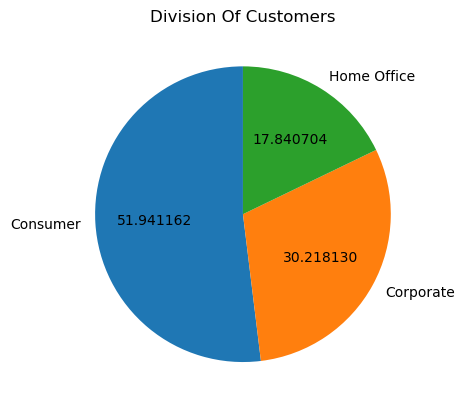

In [88]:
df['Segment'].value_counts().plot(
    kind='pie',
    startangle=90,
    ylabel='',
    autopct='%1f',
    title='Division Of Customers'
)
plt.show()

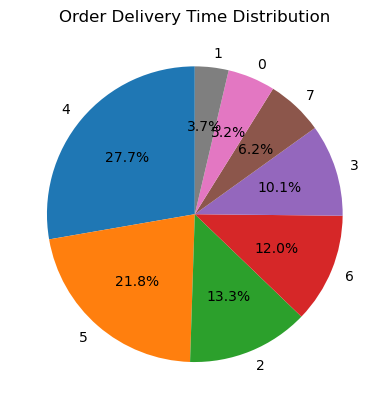

In [8]:
df['Delivery Days'].value_counts().plot(
    kind='pie',
    startangle=90,
    ylabel='',
    autopct='%1.1f%%',
    title='Order Delivery Time Distribution'
)
plt.show()

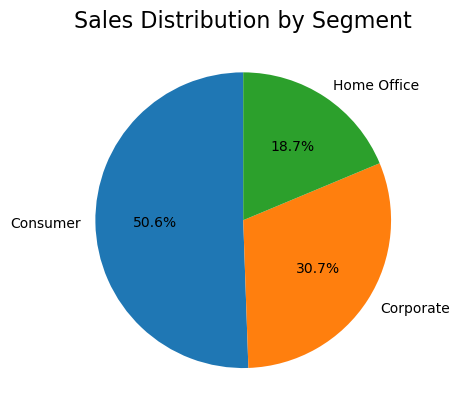

In [4]:
sales_by_segment = df.groupby('Segment')['Sales'].sum()
plt.pie(
    sales_by_segment, 
    labels=sales_by_segment.index, 
    autopct='%1.1f%%', 
    startangle=90
)
plt.title("Sales Distribution by Segment", fontsize=16)
plt.show()

In [9]:
ship_analysis = df.groupby('Ship Mode')[['Sales', 'Profit']].sum().sort_values('Sales', ascending=False)
print(ship_analysis)


                       Sales       Profit
Ship Mode                                
Standard Class  1.358216e+06  164088.7875
Second Class    4.591936e+05   57446.6354
First Class     3.514284e+05   48969.8399
Same Day        1.283631e+05   15891.7589


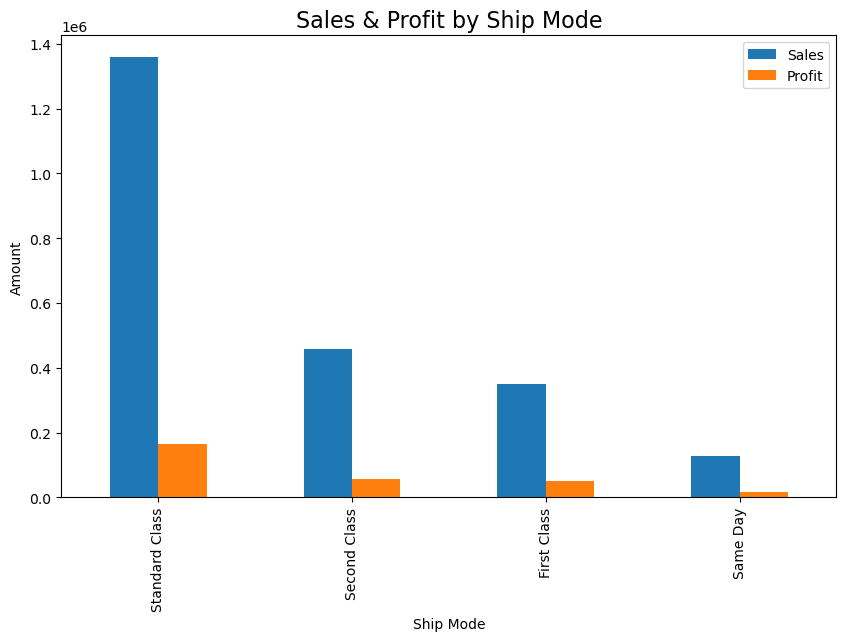

In [10]:
ship_analysis[['Sales','Profit']].plot(kind='bar', figsize=(10,6))
plt.title("Sales & Profit by Ship Mode", fontsize=16)
plt.ylabel("Amount")
plt.show()

In [5]:
df.to_excel("updated_dataset.xlsx", index=False)